### Student Details

### Student Name: Aidan Keeshan
### Student ID: 18200117

You may add two extra libraries: one to make a train-test split and one to perform a grid search

# Task 4
  * Perform classification on dataset_1 using an **SVM with linear kernel**
  * Experiment with the C-parameter to find the widest margin solution with a **hard margin** and a **soft margin**. 

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| No plots provided or plots do not provide the correct information. | Plot for either soft- or hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. Numerical data with explanation to support the conclusions drawn from the graphs.|

In [1]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import math

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning,UserWarning))

Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
def plot_bound(X_train,y_train,clf,title):
    ###############
    c = np.repeat('forestgreen', len(y_train))
    c[np.where(y_train==1)] = 'skyblue'
    ###############
    plt.scatter(X_train[:, 0], X_train[:, 1], c=c, s=30)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

def plot_eout(X_test,y_test,clf,title):
    ###############
    c = np.repeat('forestgreen', len(y_test))
    c[np.where(y_test==1)] = 'skyblue'
    ###############
    y_hat = clf.predict(X_test)
    diff = np.not_equal(y_test,y_hat)
    c[diff] = 'red'
    plt.scatter(X_test[:, 0], X_test[:, 1], c=c, s=30)
    plt.title(title+' Eout: {:2f}'.format(np.sum(diff)/len(diff)))
    plt.axis('equal')

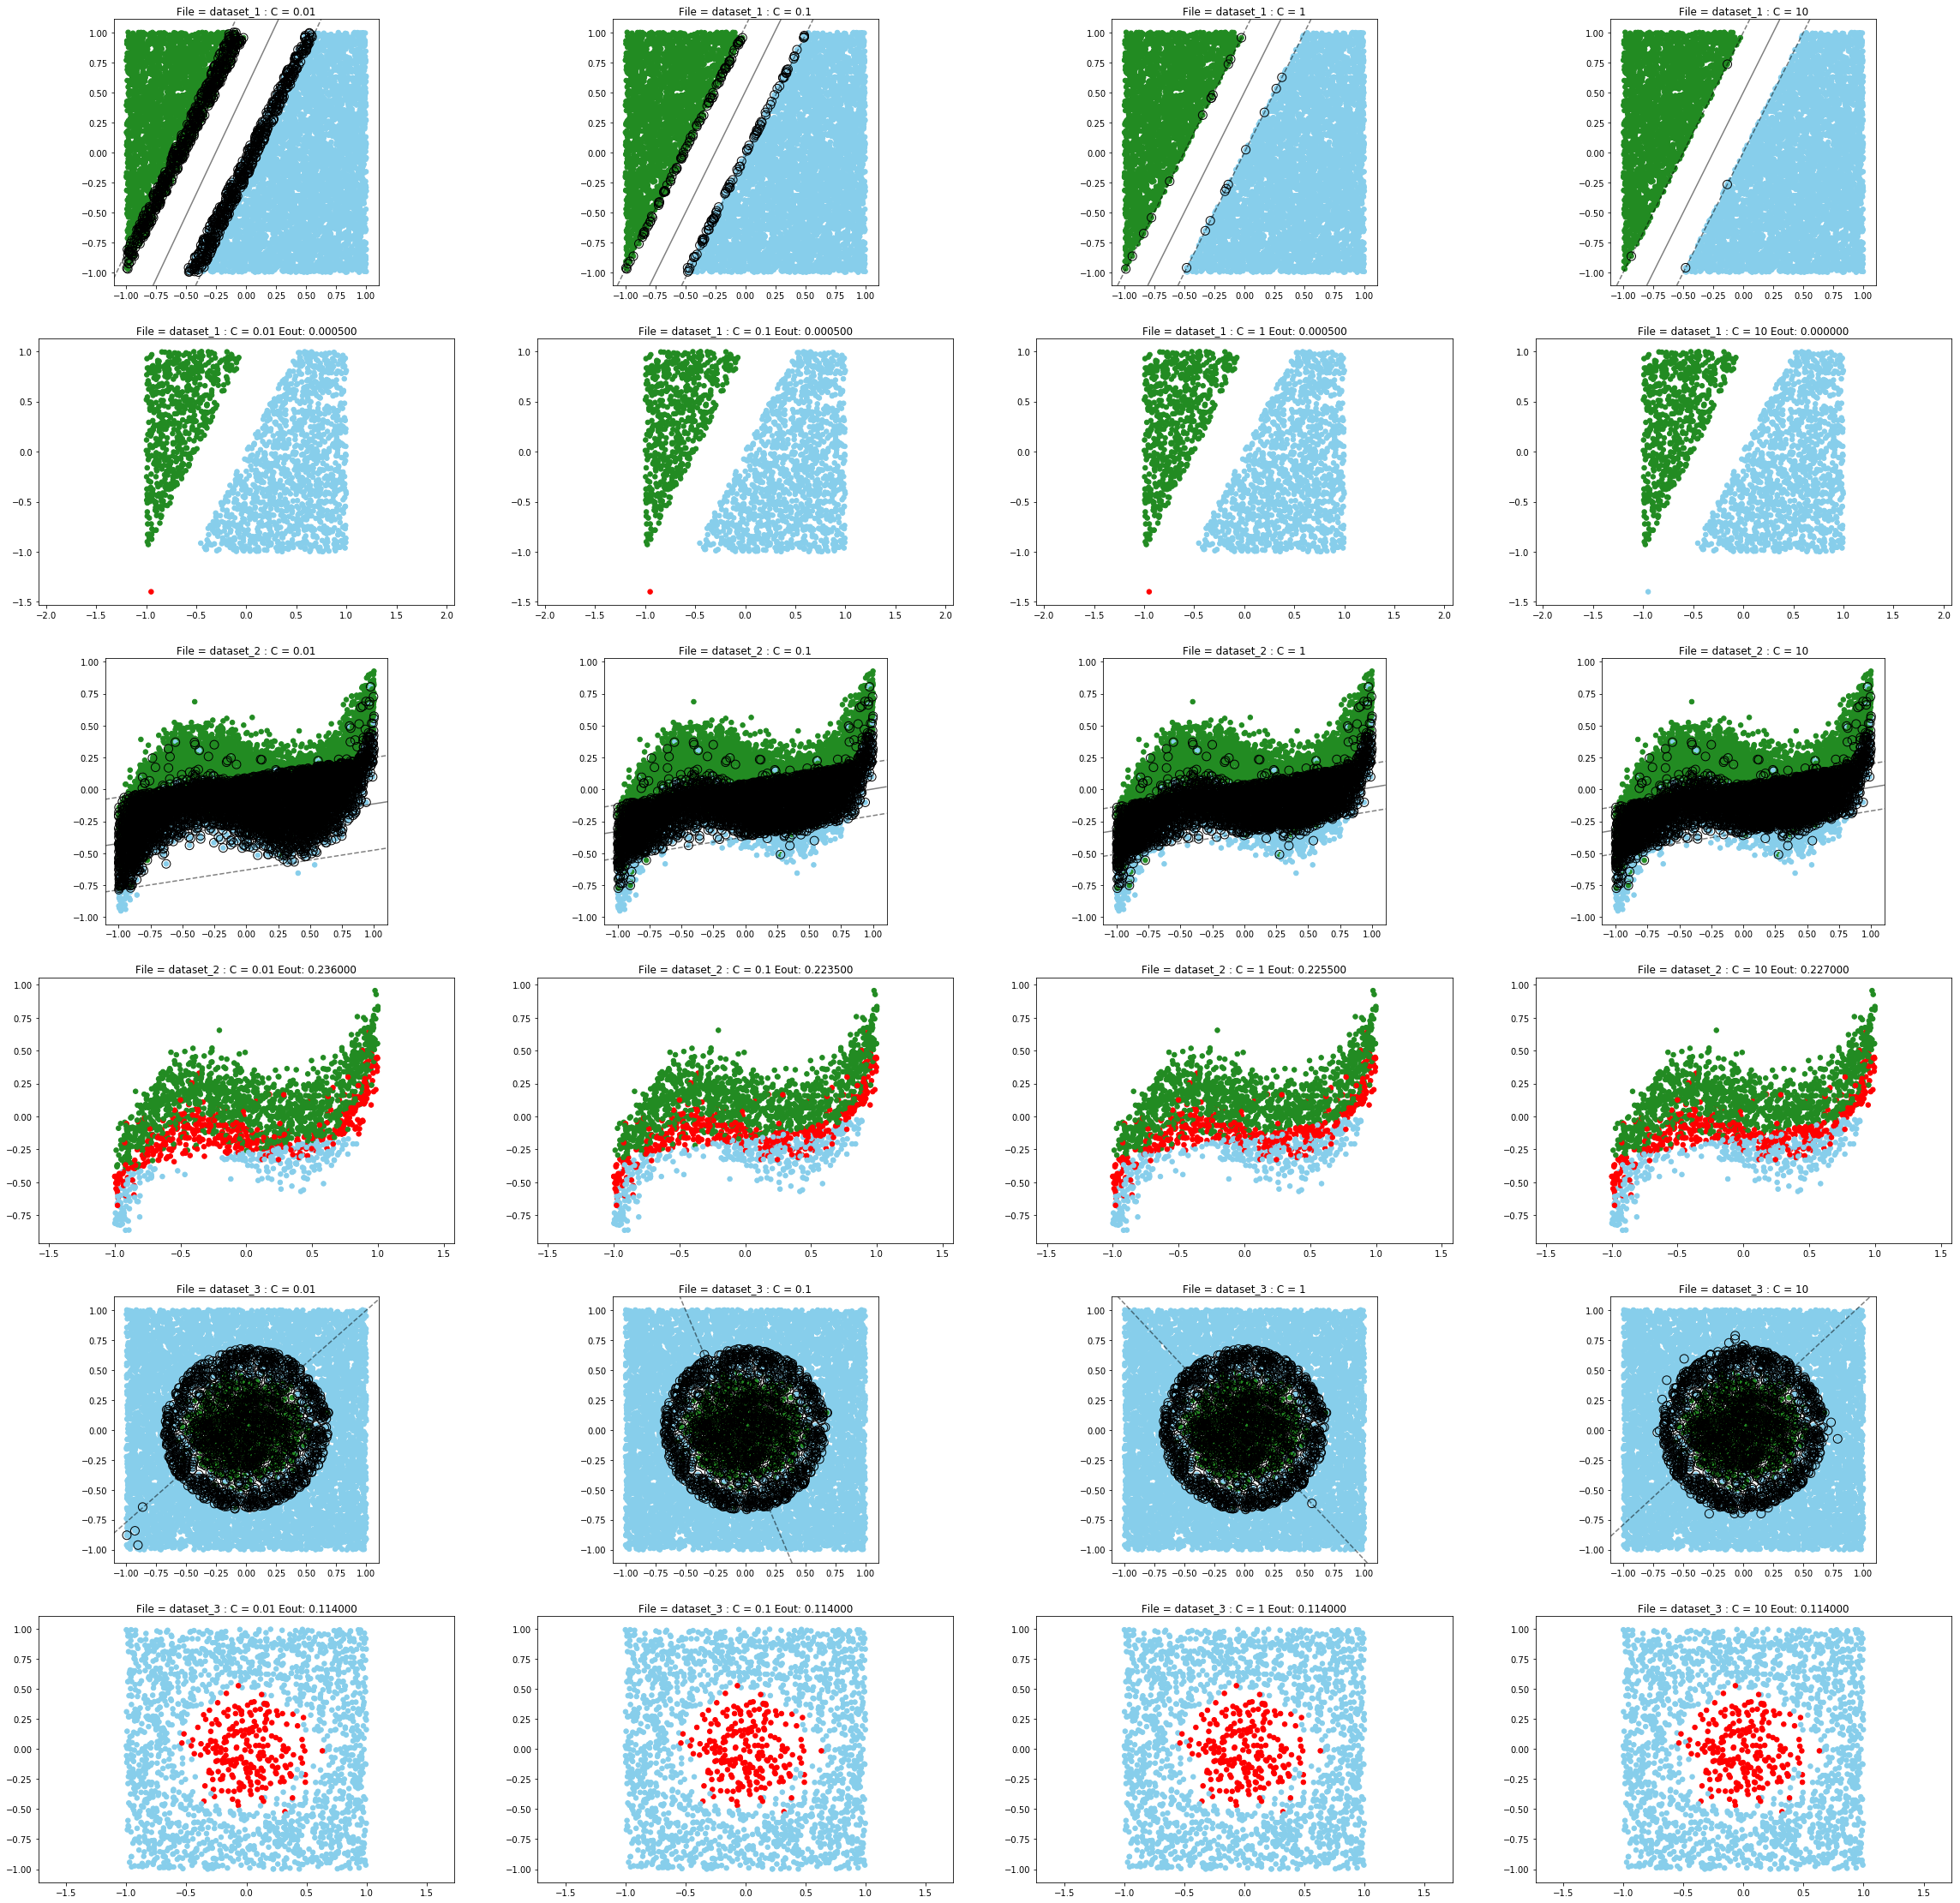

In [3]:
from sklearn.model_selection import train_test_split
from dask_searchcv import GridSearchCV

def import_csv(src_csv):
    ds = np.genfromtxt(src_csv, delimiter=',',skip_header=1,dtype=[('index','u4'),('VAR1','f8'),('VAR2','f8'),('TARGET','u1')])
    return train_test_split(np.c_[ds['VAR1'],ds['VAR2']], ds['TARGET'], test_size=0.2, random_state=0)

data = {}

for csv_n in [1,2,3]:
    key = 'dataset_'+str(csv_n)
    data[key] = import_csv(key+'.csv')

f = plt.figure(figsize=(40,40))
i = -3
for key in data:
    i += 4
    for c in [0.01,0.1,1,10]:
        GS = GridSearchCV(svm.SVC(), {'kernel':['linear'],'C': [c]},cv=3,n_jobs=-1)
        clf = GS.fit(data[key][0],data[key][2])
        ax = f.add_subplot(6,4,i)
        plot_bound(data[key][0],data[key][2],clf,'File = {} : C = {}'.format(key,c)) # Train Data
        ax = f.add_subplot(6,4,i+4)
        plot_eout(data[key][1],data[key][3],clf,'File = {} : C = {}'.format(key,c)) # Test Data
        i += 1

### Task 4

A low C is a soft margin which allows for more support vectors show as shown by black points.   
As C increases the number of support vectors reduces as seen moving left to right.

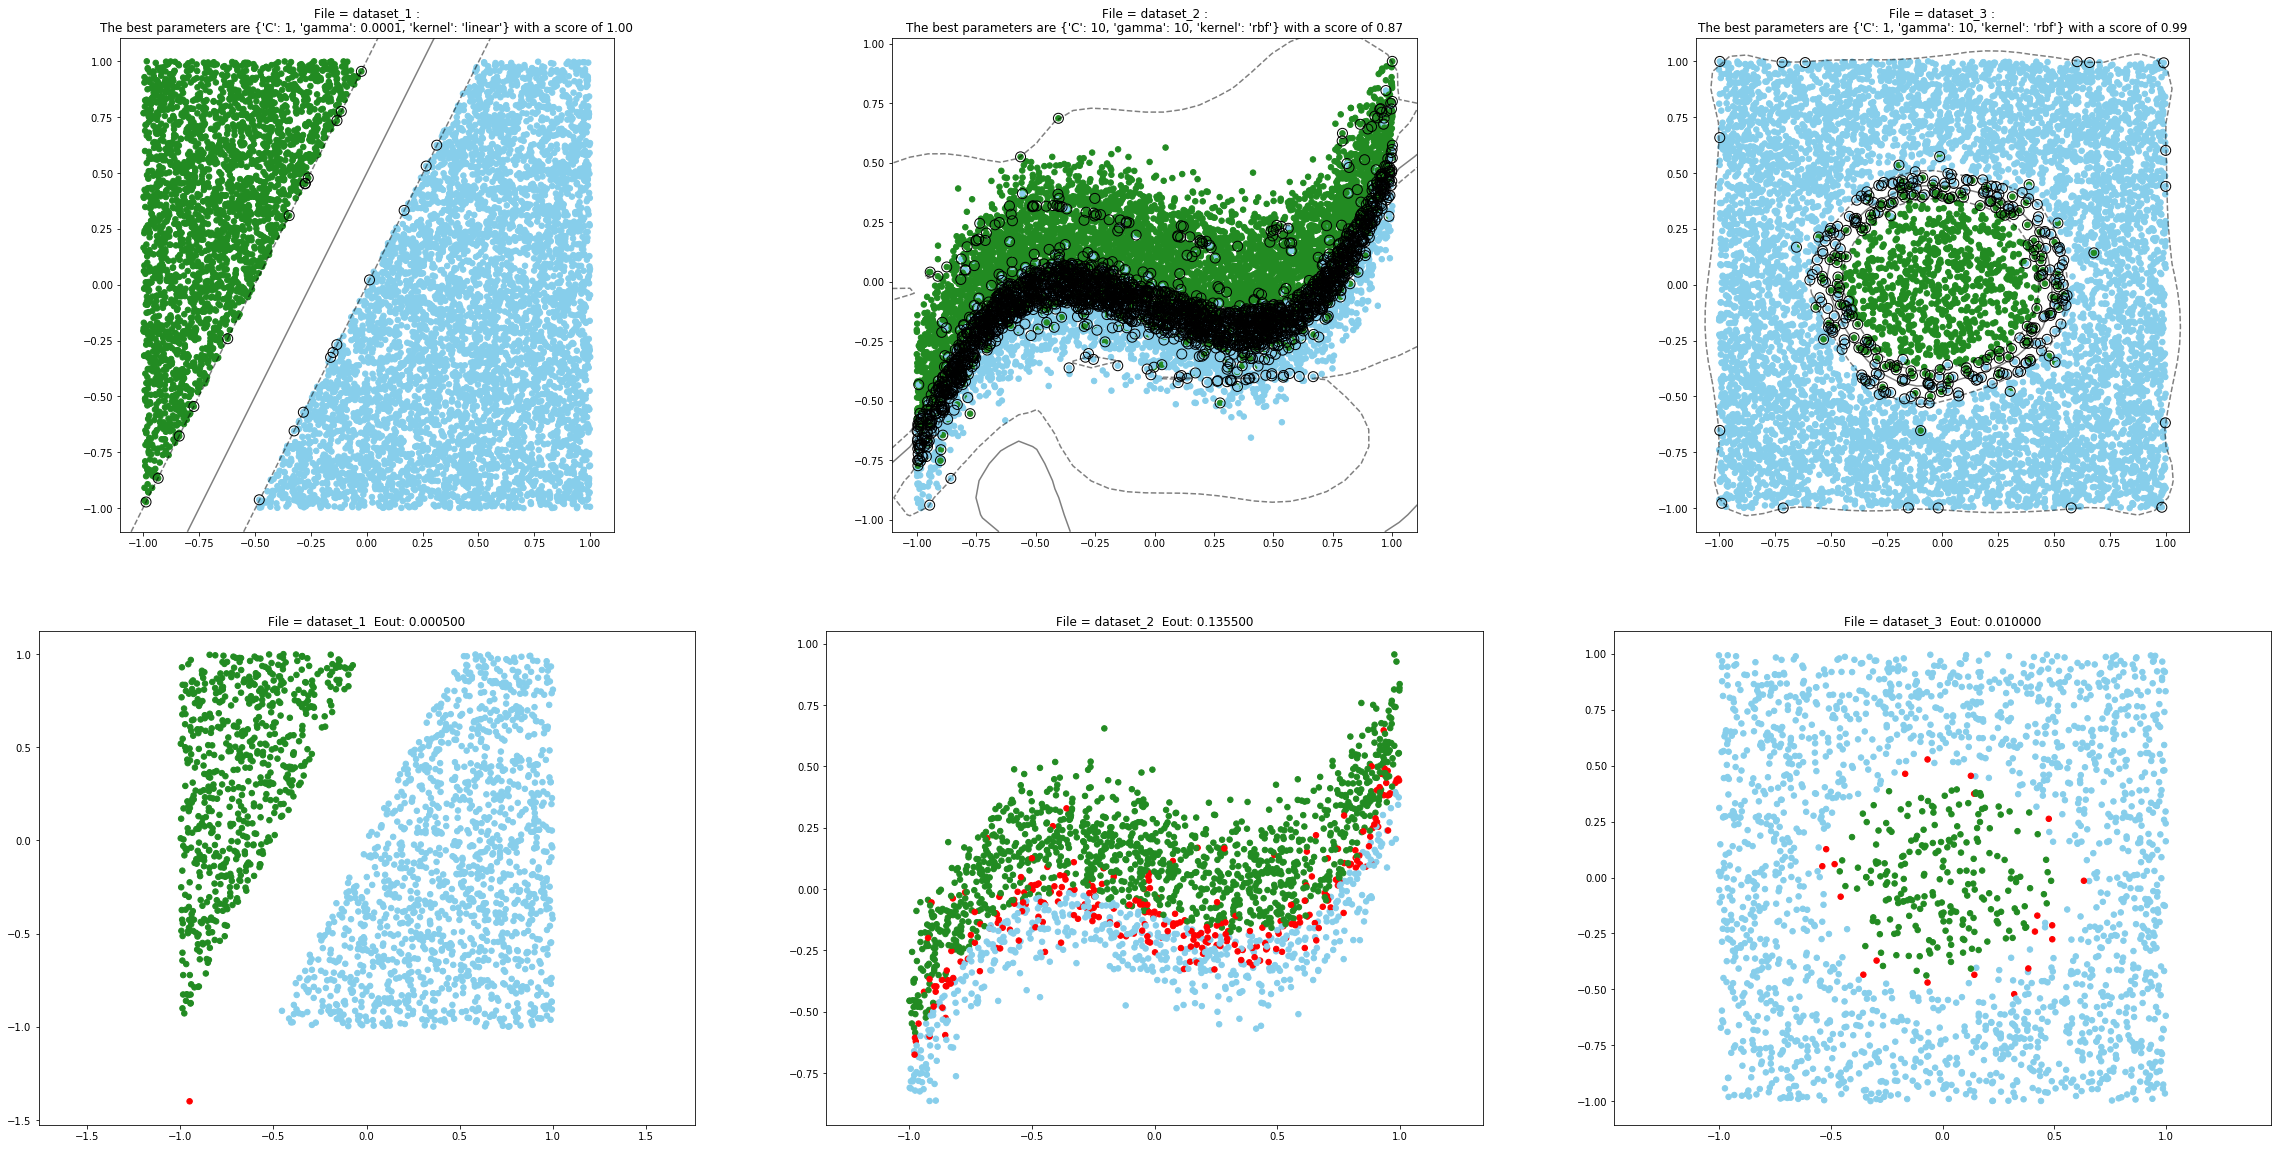

In [13]:
f = plt.figure(figsize=(40,20))
GS_results = []
for i, key in enumerate(data.keys()):
    params = [{'kernel': ['linear','rbf'],'C': [1,10,33,100], 'gamma': [0.0001, 0.001,1,10]},{'kernel': ['poly'],'C': [1,10], 'degree':[2,3,4]}]
    GS = GridSearchCV(svm.SVC(),params,cv=10,return_train_score=True)
    clf = GS.fit(data[key][0],data[key][2])
    GS_results.append(GS.cv_results_)
    ax = f.add_subplot(2,3,i+1)
    plot_bound(data[key][0],data[key][2],clf,'File = {} :\nThe best parameters are {} with a score of {:.2f}'.format(key,GS.best_params_, GS.best_score_)) # Train Data
    ax = f.add_subplot(2,3,i+4)
    plot_eout(data[key][1],data[key][3],clf,'File = {} '.format(key)) # Test Data
f.show()

# Task 5

Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable **kernels and hyper-parameters**.

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| Exploration with sub-optimal kernel / hyper parameter choices for all data sets. | Suitable kernels and hyper parameters proposed for one data set. | Suitable kernels and hyper parameters proposed for two data sets. Proper use of train and test data and plots of the SVM hyperplane. | Suitable kernels and hyper parameters  proposed for all datasets. Proper use of train and test data and plots of the SVM hyperplane. Evidence of a structured approach to the selection of hyper-parameters. |


## Task 5 Conclusion

Use of many parameter in Gridsearch (GS) cause many issues. After isolating poly kernel in own parameters ran much faster.   
Martin Power work shows how to merge parameters of varying length for gridserach.    
I would have expected that dataset 3 would be more aligned to poly kernel but the rbf kernel is better as per the GS


## 15 Point Example Dataset

The dataset was based on dataset 1 to create something which would be suited for linear kernel with 5 point on 2 vectors.   
Simulation run to see if c o randomness impacts the number of support vectors.  
Implies the randomness is more important.  


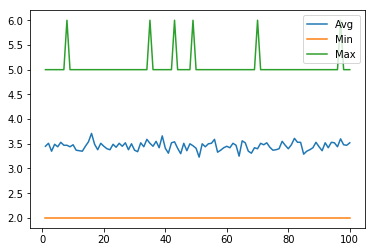

In [14]:
def run_exp():
    x1 = np.random.uniform(1, 1.2, 7)
    y1 = np.random.uniform(-0.5, 0.5, 7)
    for i in range(0,2):
        x1[i]  = 1
    s1 = np.c_[x1,y1]

    x2 = np.random.uniform(-1.2, -1.0, 8)
    y2 = np.random.uniform(-0.5, 0.5, 8)
    for i in range(0,3):
        x2[i]  = -1
    s2 = np.c_[x2,y2]
    s = np.concatenate((s1, s2))
    y = np.zeros(15)
    for i in range(0,7):
        y[i] = 1
    return s,y

num_supp_avg = []
num_supp_min = []
num_supp_max = []
for c in range(1,101):
    num_supp = []
    clf = svm.SVC(C=c, kernel='linear')
    for i in range(0,100):
        s,y = run_exp()
        clf.fit(s, y)
        num_supp.append(len(clf.support_vectors_))
    num_supp_avg.append(np.mean(num_supp))
    num_supp_min.append(np.min(num_supp))
    num_supp_max.append(np.max(num_supp))
plt.plot(range(1,101),num_supp_avg,label='Avg')
plt.plot(range(1,101),num_supp_min,label='Min')
plt.plot(range(1,101),num_supp_max,label='Max')
plt.legend()
plt.show()

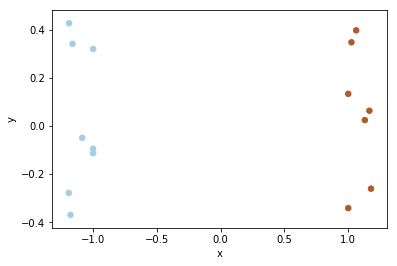

In [15]:
s,y = run_exp()
plt.scatter(s[:, 0], s[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel("x")
plt.ylabel("y")
#plt.show()
#plt.draw()
plt.savefig('scatter.png', dpi=100)

In [16]:
def scatter_15(outfile):
    plt.scatter(s[:, 0], s[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #plt.show()
    plt.savefig(outfile, dpi=100)

### Linear Kernal

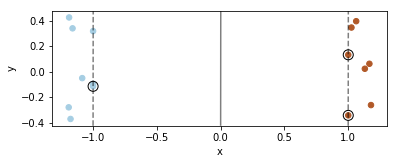

In [17]:
clf = svm.SVC(C=10, kernel='linear')
clf.fit(s, y)
scatter_15('scatter_boundary.png')

### RBF Kernal

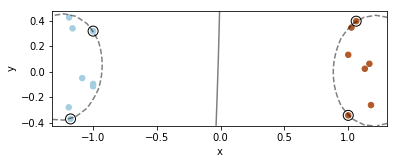

In [18]:
clf = svm.SVC(C=10, kernel='rbf')
clf.fit(s, y)
scatter_15('scatter_boundary_rbf.png')

## Workings for Circle/Poly Kernel

To work poly kernel was worked on in isolation for dataset_3 here.  
The time to run was long and needed to better visualise what had been mentioned in earlier etivities    and  relevant here


http://python.astrotech.io/machine-learning/support-vector-machines.html

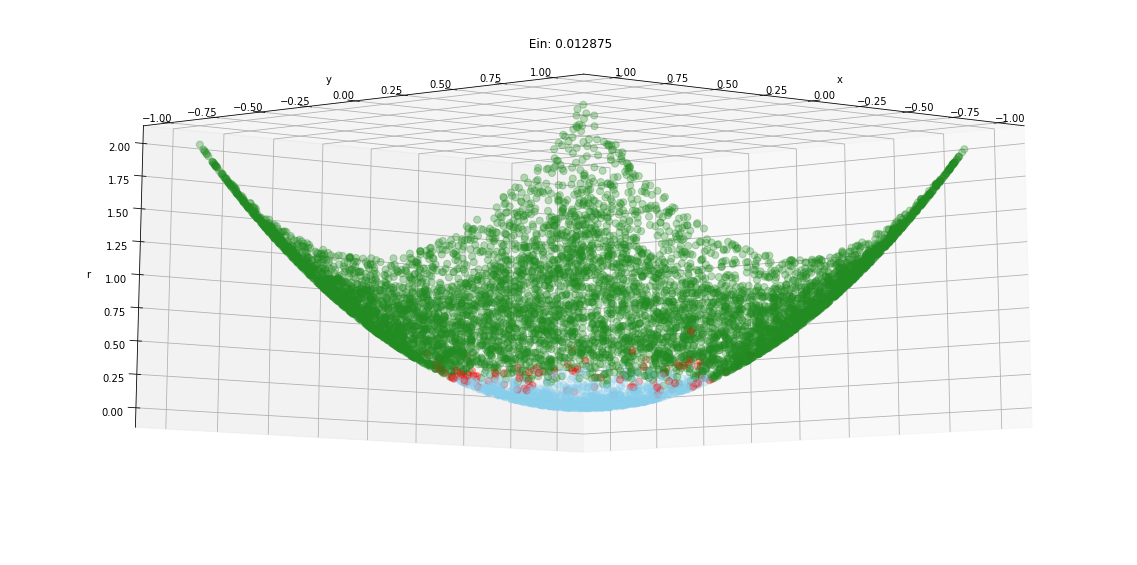

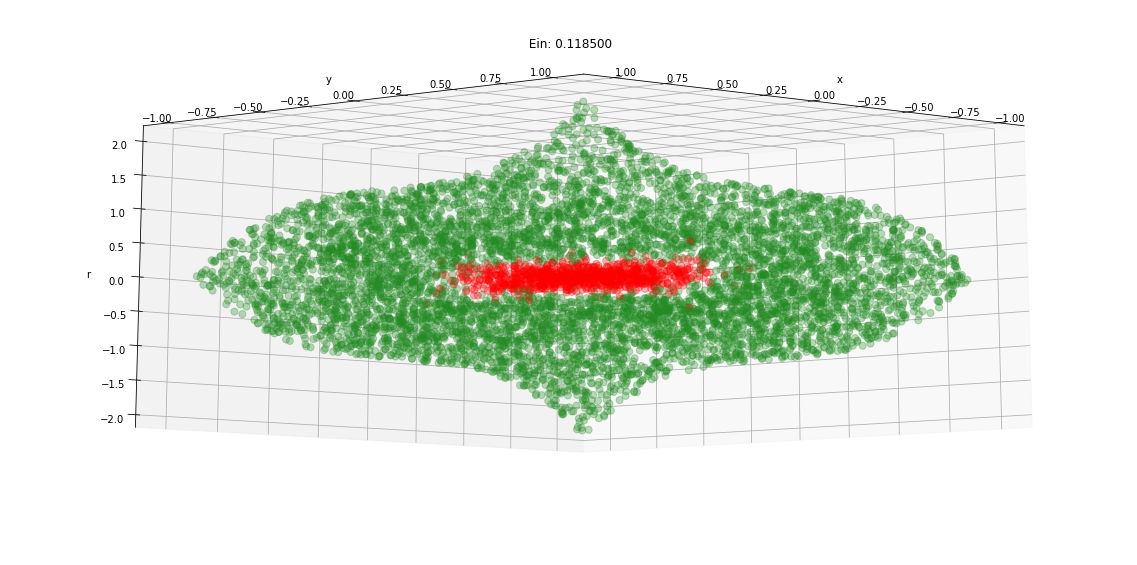

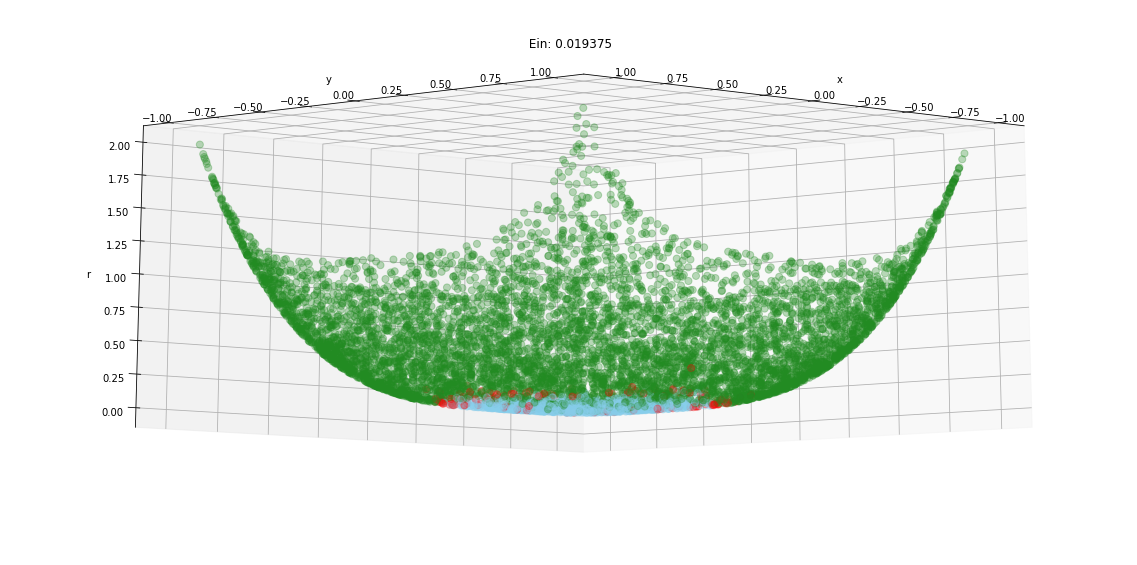

In [23]:
from mpl_toolkits import mplot3d

X,y = data['dataset_3'][0],data['dataset_3'][2]

def plot_3D(d,elev=-10, azim=45):
    plt.figure(figsize=(20,10))
    ax = plt.subplot(projection='3d')
    r = (X[:, 0] ** d + X[:, 1] ** d)
    ax.scatter3D(X[:, 1], X[:, 0], r, c=c, s=50,alpha=0.3)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    ax.set_title(' Ein: {:2f}'.format(np.sum(diff)/len(diff)))
    plt.show()


for d in [2,3,4]:
    clf = svm.SVC(kernel='poly',gamma='auto',C=10,degree=d)
    clf.fit(X, y)
    y_hat = clf.predict(X)
    c = np.repeat('forestgreen', len(y))
    c[np.where(y!=1)] = 'skyblue'
    diff = np.not_equal(y,y_hat)
    c[diff] = 'red'
    plot_3D(d)

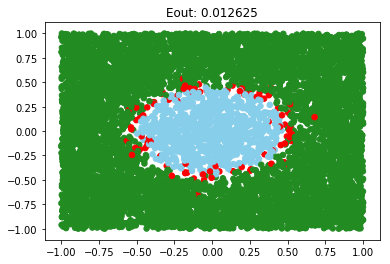

In [20]:
clf = svm.SVC(kernel='rbf')
X,y = data['dataset_3'][0],data['dataset_3'][2]
clf.fit(X, y)
y_hat = clf.predict(X)

c = np.repeat('forestgreen', len(y))
c[np.where(y!=1)] = 'skyblue'
diff = np.not_equal(y,y_hat)
c[diff] = 'red'


plt.scatter(X[:, 0], X[:, 1], c=c, s=30)
plt.title('Eout: {:2f}'.format(np.sum(diff)/len(diff)))
plt.show()